In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from reader import Reader


# TODO add widget selection

def dataset_to_df(dataset_name: str):
    reader = Reader(dataset_name)
    sentences, slots, intents = reader.read_dataset(mode='train')

    return pd.DataFrame(list(zip(sentences, slots, intents)),
                        columns=['utterance', 'slots', 'intent'])


DATASET_NAME = 'atis' # change between 'atis' and 'snips'
df = dataset_to_df(DATASET_NAME)
df.head()

,utterance,slots,intent
0,"[i, want, to, fly, from, baltimore, to, dallas...","[O, O, O, O, O, B-fromloc.city_name, O, B-tolo...",atis_flight
1,"[round, trip, fares, from, baltimore, to, phil...","[B-round_trip, I-round_trip, O, O, B-fromloc.c...",atis_airfare
2,"[show, me, the, flights, arriving, on, baltimo...","[O, O, O, O, O, O, B-toloc.city_name, O, B-arr...",atis_flight
3,"[what, are, the, flights, which, depart, from,...","[O, O, O, O, O, O, O, B-fromloc.city_name, I-f...",atis_flight
4,"[which, airlines, fly, from, boston, to, washi...","[O, O, O, O, B-fromloc.city_name, O, B-toloc.c...",atis_airline


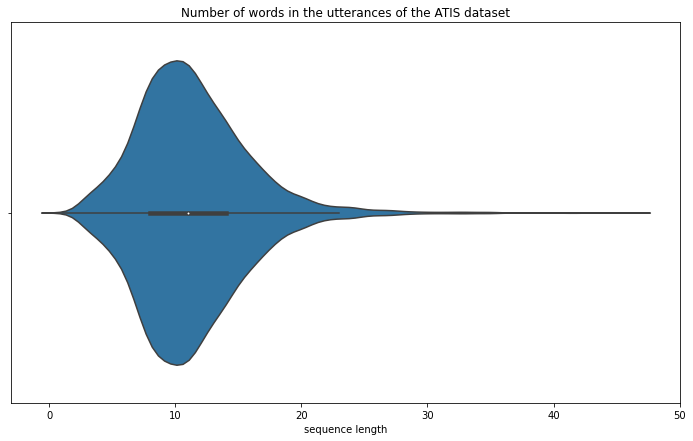

In [6]:
plt.figure(figsize=(12, 7))
chart = sns.violinplot(x=df.utterance.apply(len))
chart.set_xlabel("sequence length")
_ = chart.set_title(f"Number of words in the utterances of the {DATASET_NAME.upper()} dataset")

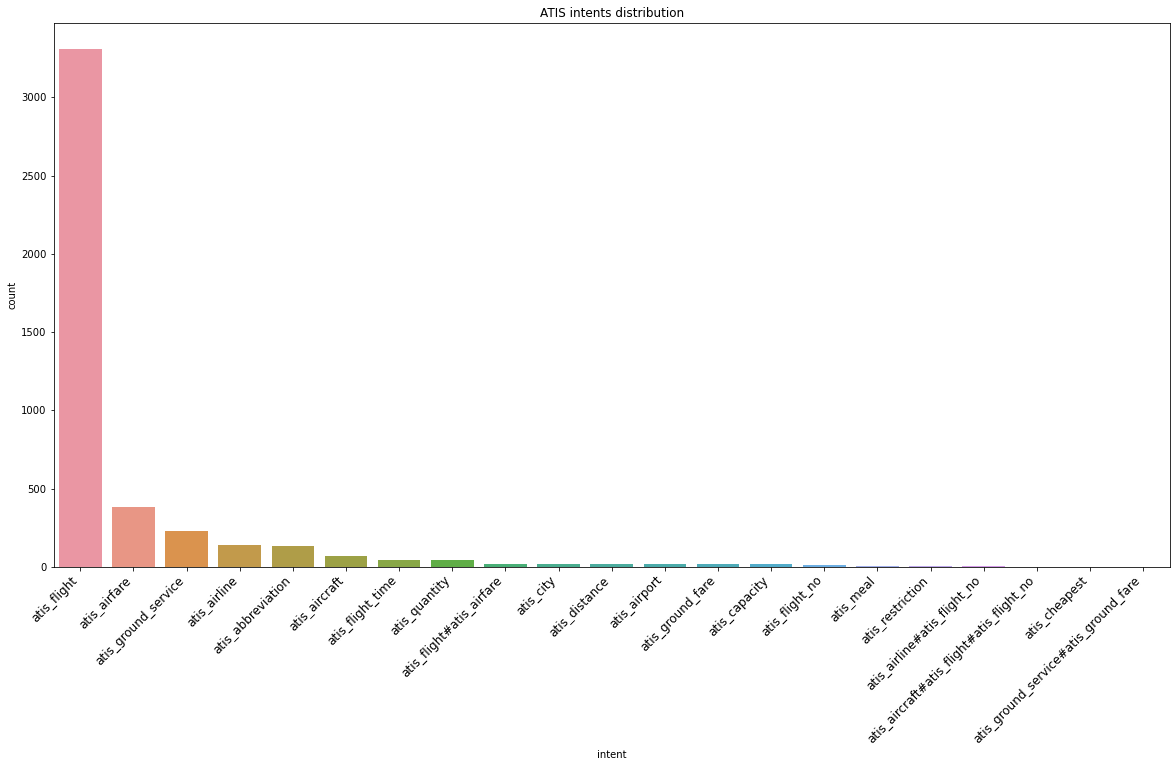

In [3]:
plt.figure(figsize=(20, 10))
chart = sns.countplot(data=df, x='intent', order=df.intent.value_counts().index)
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize='large'
)
_ = chart.set_title(f"{DATASET_NAME.upper()} intents distribution")

